In [34]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
security ="000001"
begin_date ='20131231'
end_date = '20231231'
data = ak.index_zh_a_hist(symbol =security,period='daily',start_date=begin_date,end_date= end_date)



In [35]:
data['日期'] = pd.to_datetime(data['日期'])
data['时间戳'] = data['日期'].apply(lambda x: x.timestamp())
print(data)

             日期       开盘       收盘       最高       最低        成交量           成交额  \
0    2013-12-31  2090.68  2115.98  2120.27  2087.42   80474376  7.145628e+10   
1    2014-01-02  2112.13  2109.39  2113.11  2101.02   68485486  6.192135e+10   
2    2014-01-03  2101.54  2083.14  2102.17  2075.90   84497242  7.237223e+10   
3    2014-01-06  2078.68  2045.71  2078.68  2034.01   89587607  7.289539e+10   
4    2014-01-07  2034.22  2047.32  2052.28  2029.25   63402939  5.463864e+10   
...         ...      ...      ...      ...      ...        ...           ...   
2430 2023-12-25  2909.88  2918.81  2920.63  2903.99  229814178  2.614873e+11   
2431 2023-12-26  2917.97  2898.88  2917.97  2892.84  228140855  2.602206e+11   
2432 2023-12-27  2900.15  2914.61  2917.96  2890.17  247900882  2.790486e+11   
2433 2023-12-28  2913.11  2954.70  2961.65  2909.39  339213116  3.924491e+11   
2434 2023-12-29  2950.84  2974.93  2975.03  2950.02  290672687  3.490030e+11   

        振幅   涨跌幅    涨跌额   换手率          

In [36]:
# 添加meanprice特征
data['平均'] = (data['最高'] + data['最低']) / 2
x= data.drop(['平均','日期', '收盘'], axis=1)
y = data['收盘']
# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


In [37]:
# 找到分割索引，将数据分为训练集和测试集
split_index = int(len(X_scaled) * 0.9)  # 90% 的数据用于训练，10% 的数据用于测试

X_train = X_scaled[:split_index]
X_test = X_scaled[split_index:]
y_train = y_scaled[:split_index]
y_test = y_scaled[split_index:]
# 转换数据形状以适应LSTM模型 (样本数, 时间步数, 特征数)
n_steps = 1  # 假设每个样本有1个时间步
n_features = X_train.shape[1]
X_train_reshaped = X_train.reshape((X_train.shape[0], n_steps, n_features))
X_test_reshaped = X_test.reshape((X_test.shape[0], n_steps, n_features))
data = {'layer1': 259, 'layer2': 410, 'layer3': 473, 'epochs': 7}

In [38]:
# 定义LSTM模型
model = Sequential()
model.add(Bidirectional(LSTM(data['layer1'], activation='relu', return_sequences=True), input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(data['layer2'], activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(data['layer3'], activation='relu',return_sequences=False)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train_reshaped, y_train, epochs=data['epochs'], batch_size=128)

y_pred_scaled = model.predict(X_test_reshaped)
y_pred = scaler.inverse_transform(y_pred_scaled)

# 将 y_test 转换为原始范围
y_test_original = scaler.inverse_transform(y_test)



C:\Users\user\anaconda3\lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - loss: 0.0999
Epoch 2/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0123
Epoch 3/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0047
Epoch 4/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0016
Epoch 5/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 4.2436e-04
Epoch 6/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 1.2128e-04
Epoch 7/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 1.0419e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step
[[0.33654153]
 [0.34142384]
 [0.34405777]
 [0.35242176]
 [0.36079988]
 [0.36606747]
 [0.37111726]
 [0.36943832]
 [0.36783263]
 [0.36455667]
 [0.36969107]
 [0.38446224]
 [0.3832102 ]
 [0.38267475]
 [0.38295522]
 [0.39382812]
 [0.40878162]
 [0.39692903]
 [0.39893615]
 [0.40668854]
 [0.394758  ]
 [0.3883748 ]
 [0.3902294 ]
 [0.38755438]
 [0.39060074]
 [0.395127  ]
 [0.39957187]
 [0.4050546 ]
 [0.403761  ]
 [0.39749548]
 [0.38800442]
 [0.39348304]
 [0.40722084]
 [0.4036256 ]
 [0.403177

TypeError: 'float' object cannot be interpreted as an integer

C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


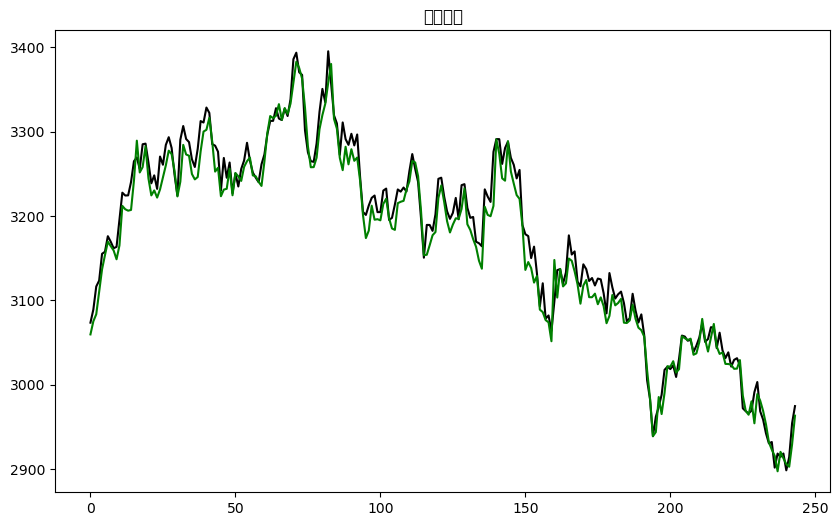

In [39]:
# 画图
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, color = 'black', label = 'real')
plt.plot(y_pred, color = 'green', label = 'Predicted')
plt.title('指数预测')
plt.xticks(range(len(y_test_original)/30), [f'2024-0{i+1}-01' for i in range(len(y_test_original)/3])
plt.xlabel('日期')
plt.ylabel('指数')
plt.legend()
plt.show()